# **TABLE OF CONTENTS**

1- Import Libraries

2- Load and Preview Data

3- Data Cleaning

4- Exploratory Data Analysis (EDA)


# 1. Import Libraries

**pandas (pd):** This is the main library for working with datasets. It helps you read CSV files, create tables (DataFrames), and manipulate data.

**numpy (np):** This handles numerical operations. It works with arrays, performs math functions, and supports fast calculations behind the scenes.

**matplotlib.pyplot (plt):** A basic plotting library. It's great for creating line charts, bar plots, scatter plots, etc.

**seaborn (sns):** Built on top of matplotlib, this library makes statistical plots look prettier and easier to create 

In [1]:
#Import necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#Suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
#Set Seaborn style for better-looking plots
sns.set(style="darkgrid")


# 2. Load and Preview Data


In [2]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
print("\n 👉First 5 rows👈:")
print(df.head())
print("\n 👉Last 5 rows👈:")
print(df.tail())

print("\n ✨Column names✨:")
print(df.columns.tolist())
print("\n 🛎️Dataset info🛎️:")
print(df.info())
print("\n 🚨Missing values per column🚨:")
print(df.isnull().sum())



 👉First 5 rows👈:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8      

# 3. Data Cleaning
In this data cleaning step, you're performing duplicate detection and removal, which is a fundamental part of cleaning any dataset. 

In [3]:
# Check duplicates
print("Duplicates:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()
print("New shape:", df.shape)

Duplicates: 0
New shape: (1143, 13)


Summary of Data Cleaning Steps:

✔️ Identified the number of duplicate records within the dataset.

✔️ Removed duplicate entries to prevent redundancy and potential data distortion.

✔️ Verified the updated dataset size to ensure the effectiveness of the cleaning process.

# 4. Exploratory Data Analysis (EDA)
**A) Correlation Heatmap** : This visualization illustrates the strength of relationships between variables in the dataset by using colors to represent correlation coefficients. The correlation values range from -1 to 1, where:

-> -1 indicates a perfect negative correlation, meaning as one variable increases, the other decreases.

-> 0 signifies no correlation, indicating no linear relationship between the variables.

-> 1 represents a perfect positive correlation, where both variables increase together proportionally.




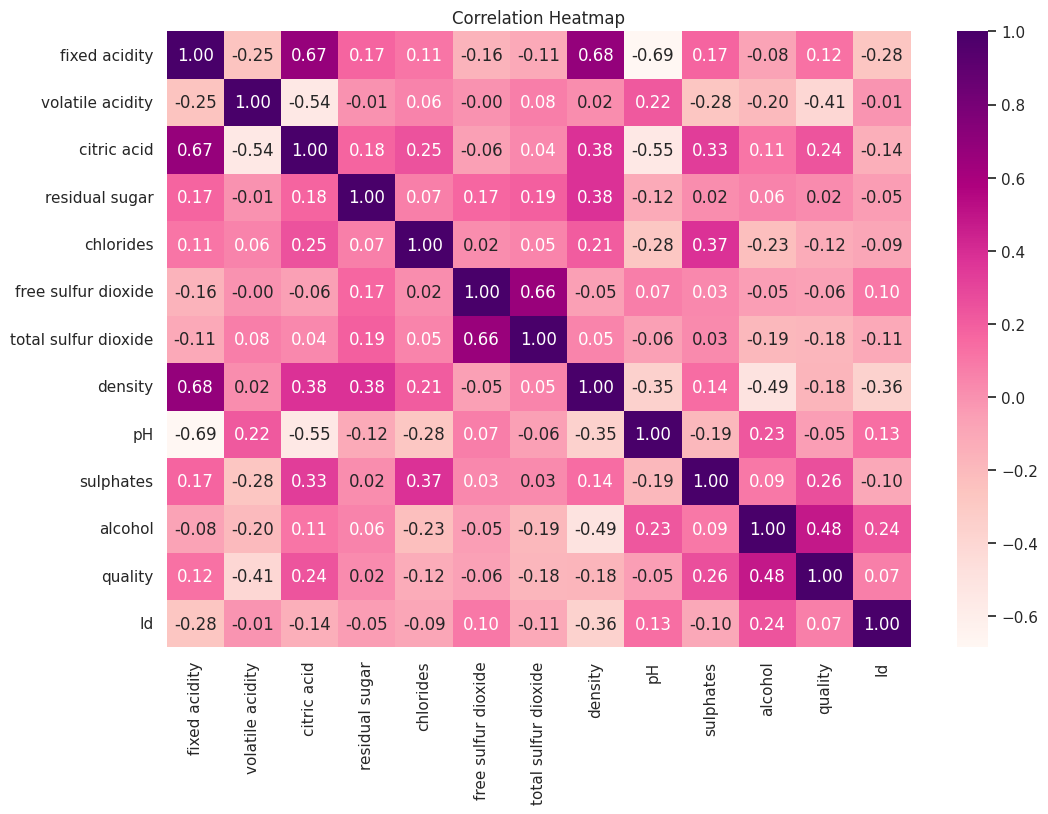

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdPu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**B)Feature Distributions (Histograms)**: Display the frequency of data values within specified intervals for numerical variables. This visualization is a fundamental tool to analyze data distribution, detect imbalances, and identify outliers.

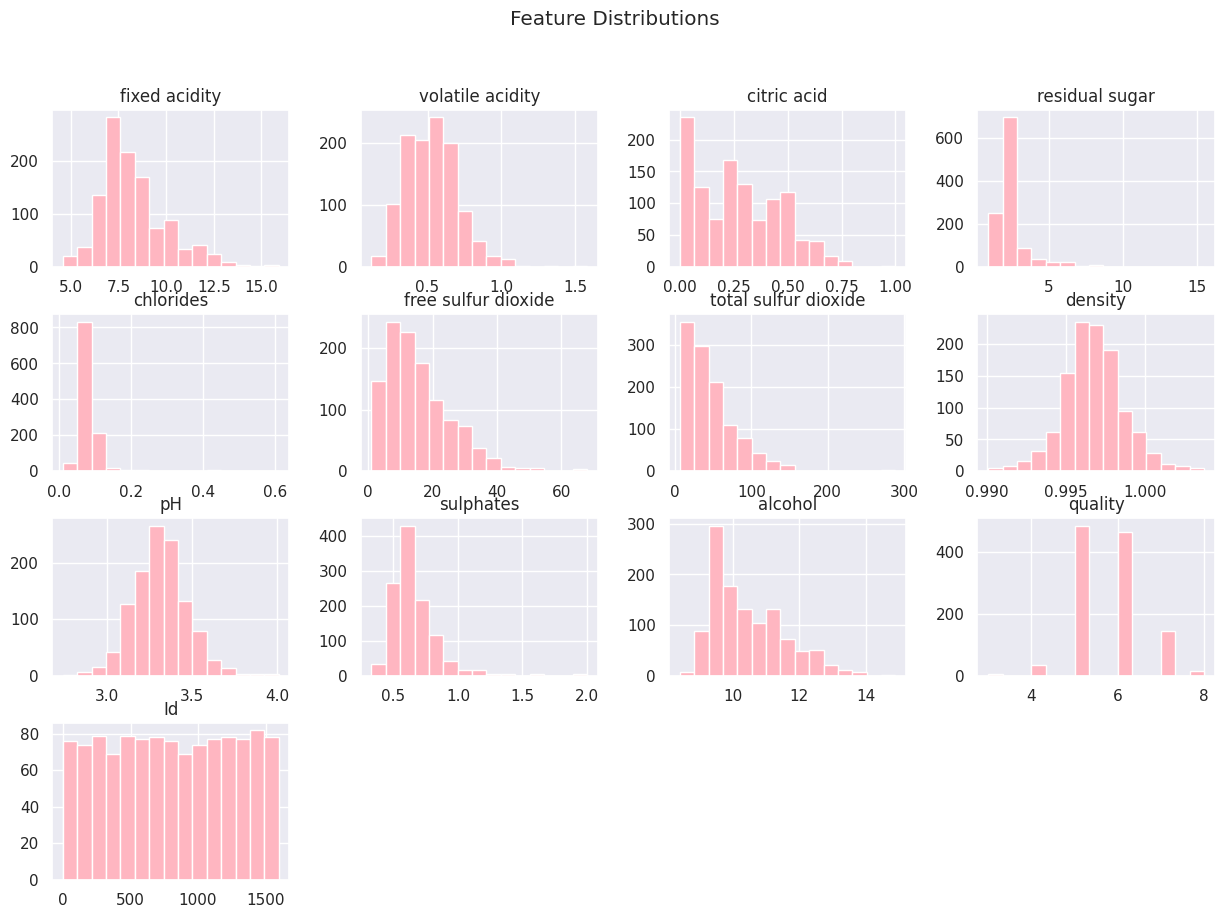

In [5]:
df.hist(bins=15, figsize=(15, 10), color='#ffb6c1')
plt.suptitle("Feature Distributions")
plt.show()

**C)Boxplot (Outlier Detection)**: Generates boxplots for each numerical feature to show data spread and detect outliers. The boxes represent the main range of the data while points outside the boxes indicate possible outliers. The plot helps to quickly identify unusual values across features.

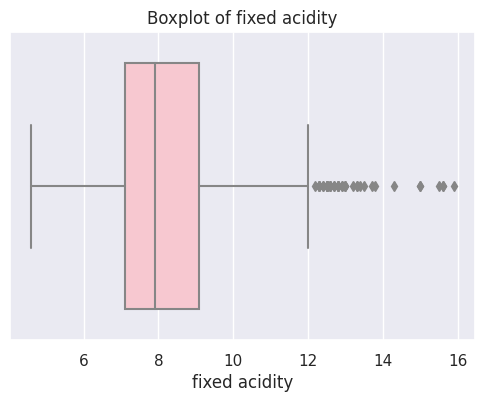

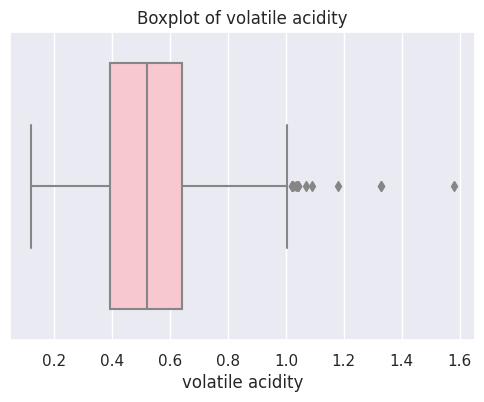

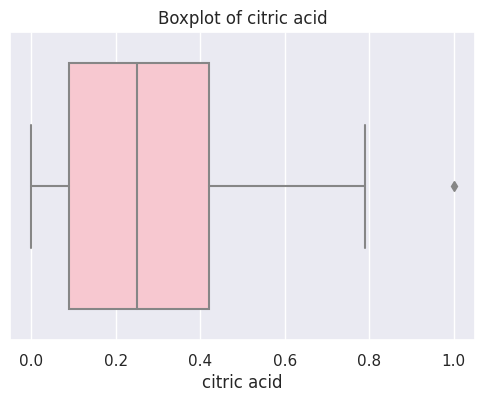

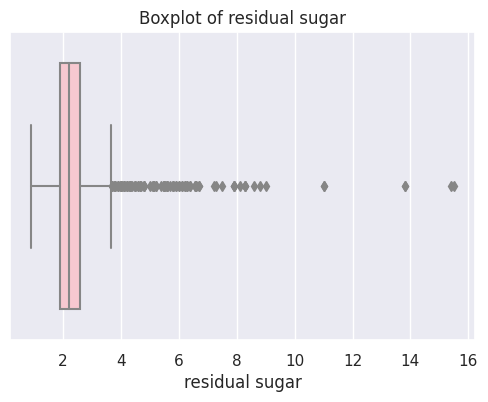

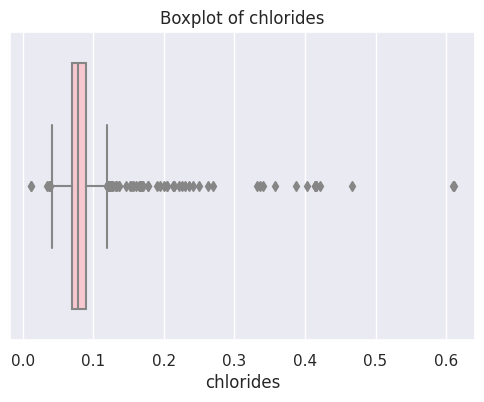

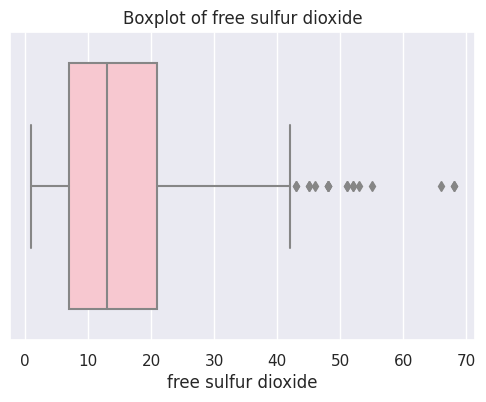

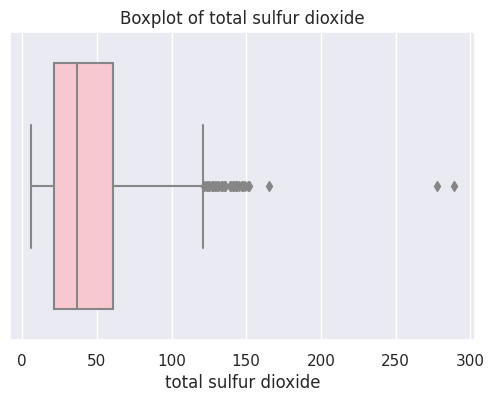

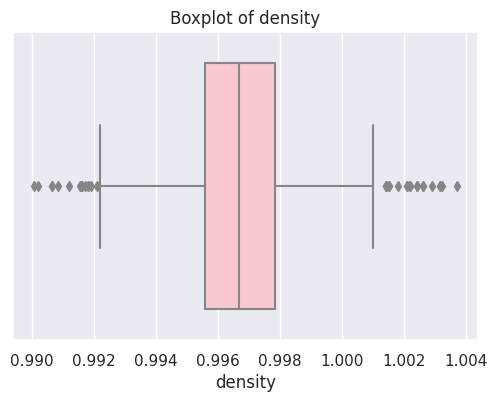

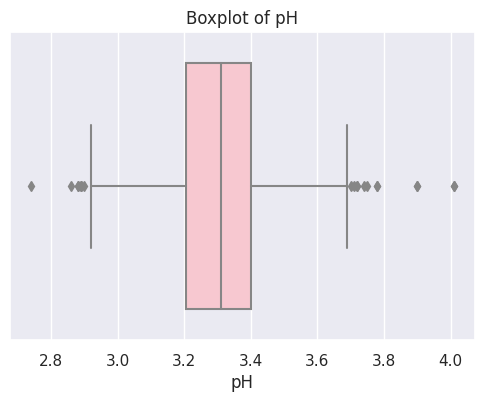

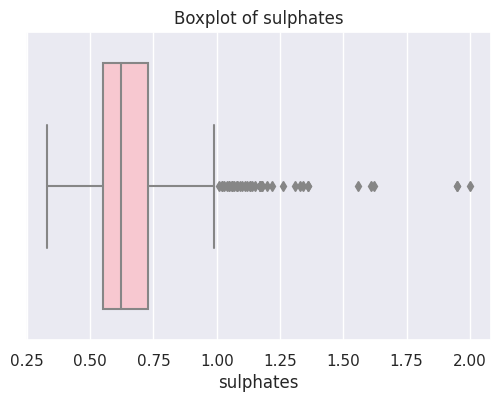

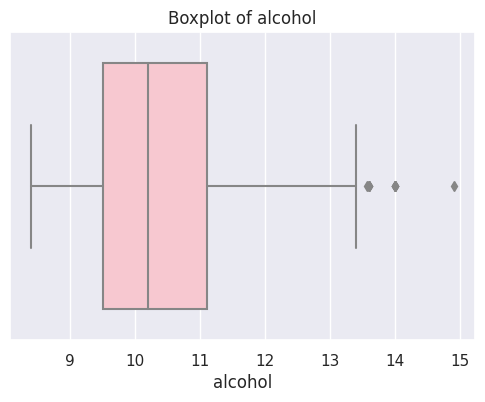

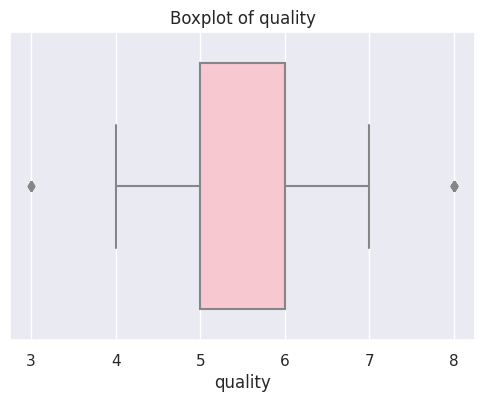

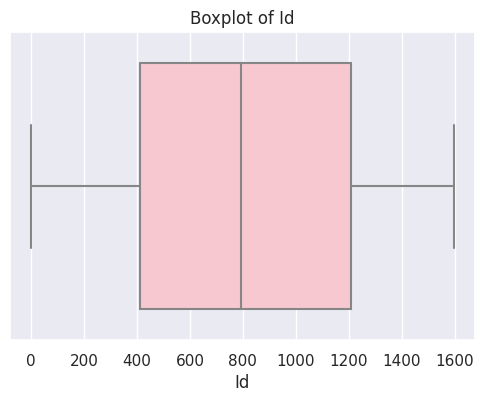

In [6]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='pink')
    plt.title(f"Boxplot of {col}")
    plt.show()

**D) Quality Distribution**: Shows how often each quality score appears in the dataset.
It helps us understand the class balance by counting how many samples exist for each quality value.
This is useful before building a model especially for classification tasks.









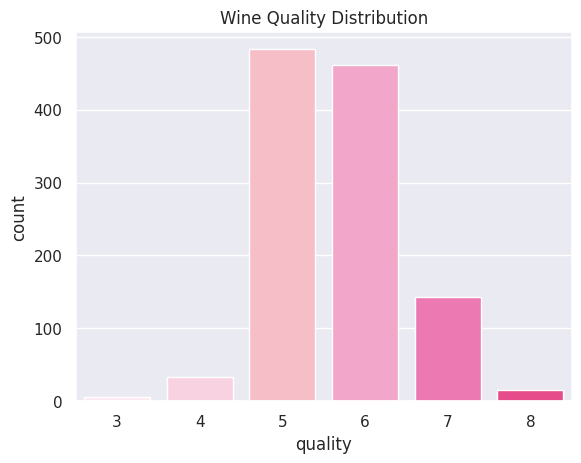

In [7]:
sweet_pink_palette = ['#ffe6f0', '#ffcce0', '#ffb6c1', '#ff99c8', '#ff66b2', '#ff3385', '#ff1a75']
sns.countplot(x="quality", data=df, palette=sweet_pink_palette)
plt.title("Wine Quality Distribution")
plt.show()

**E) Pairplot:**  Visualize pairwise relationships between multiple numerical features. This helps us observe patterns, groupings, and possible correlations between features, especially when colored by wine quality.
It is useful for identifying clusters or separations that may help in classification tasks.

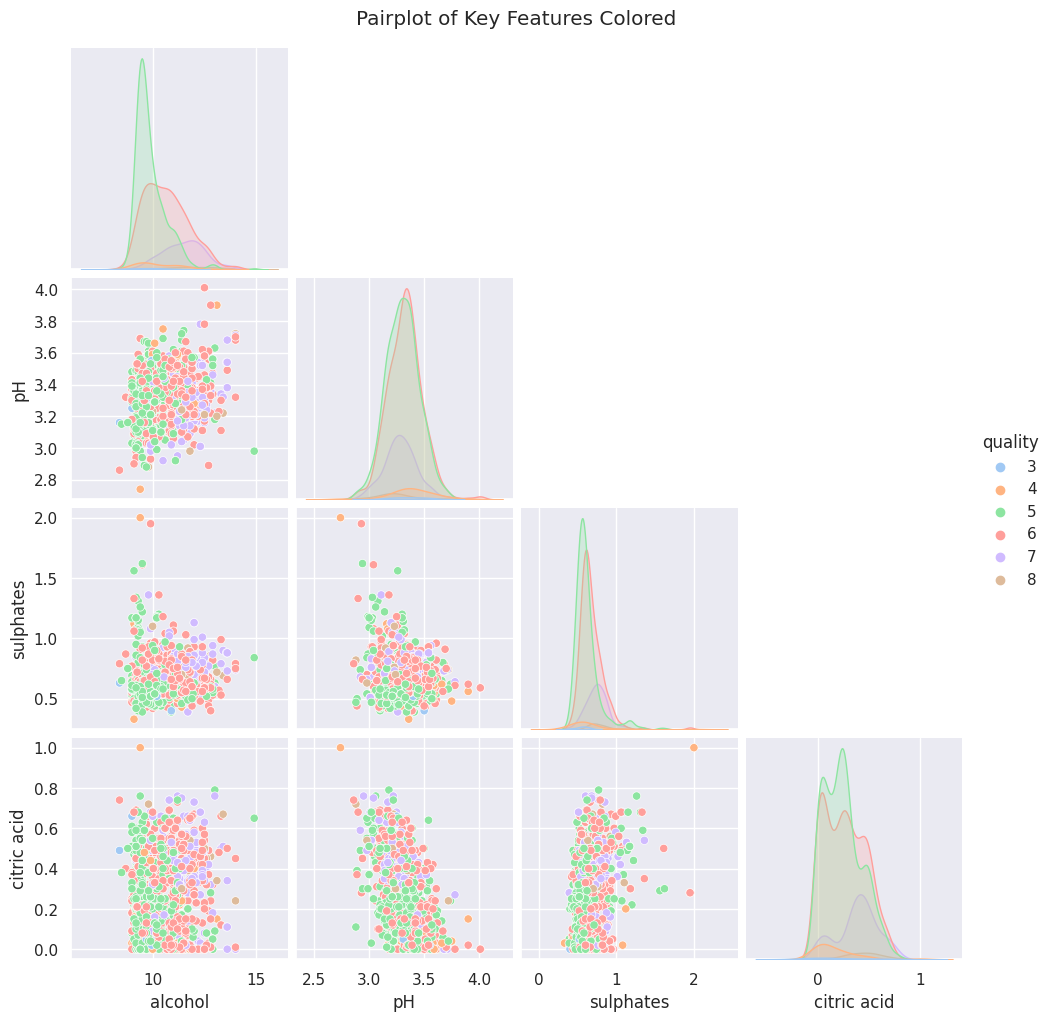

In [8]:
selected_features = ['alcohol', 'pH', 'sulphates', 'citric acid', 'quality']

sns.pairplot(df[selected_features], hue='quality', palette= 'pastel' , corner=True)
plt.suptitle("Pairplot of Key Features Colored", y=1.02)
plt.show()

**F)  Scatterplot**:  Shows the relationship between alcohol content and sulphates, colored by wine quality score.
We can observe that wines with higher alcohol and sulphates tend to have higher quality, while lower-quality wines are mostly clustered in the lower left.
This suggests a positive association between these features and wine quality.

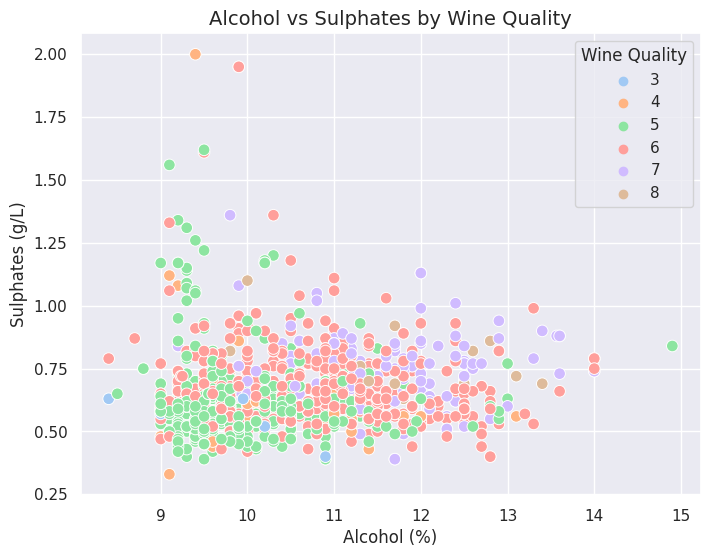

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='alcohol', y='sulphates', hue='quality', palette='pastel', s=70)
plt.title("Alcohol vs Sulphates by Wine Quality", fontsize=14)
plt.xlabel("Alcohol (%)")
plt.ylabel("Sulphates (g/L)")
plt.legend(title="Wine Quality")
plt.show()

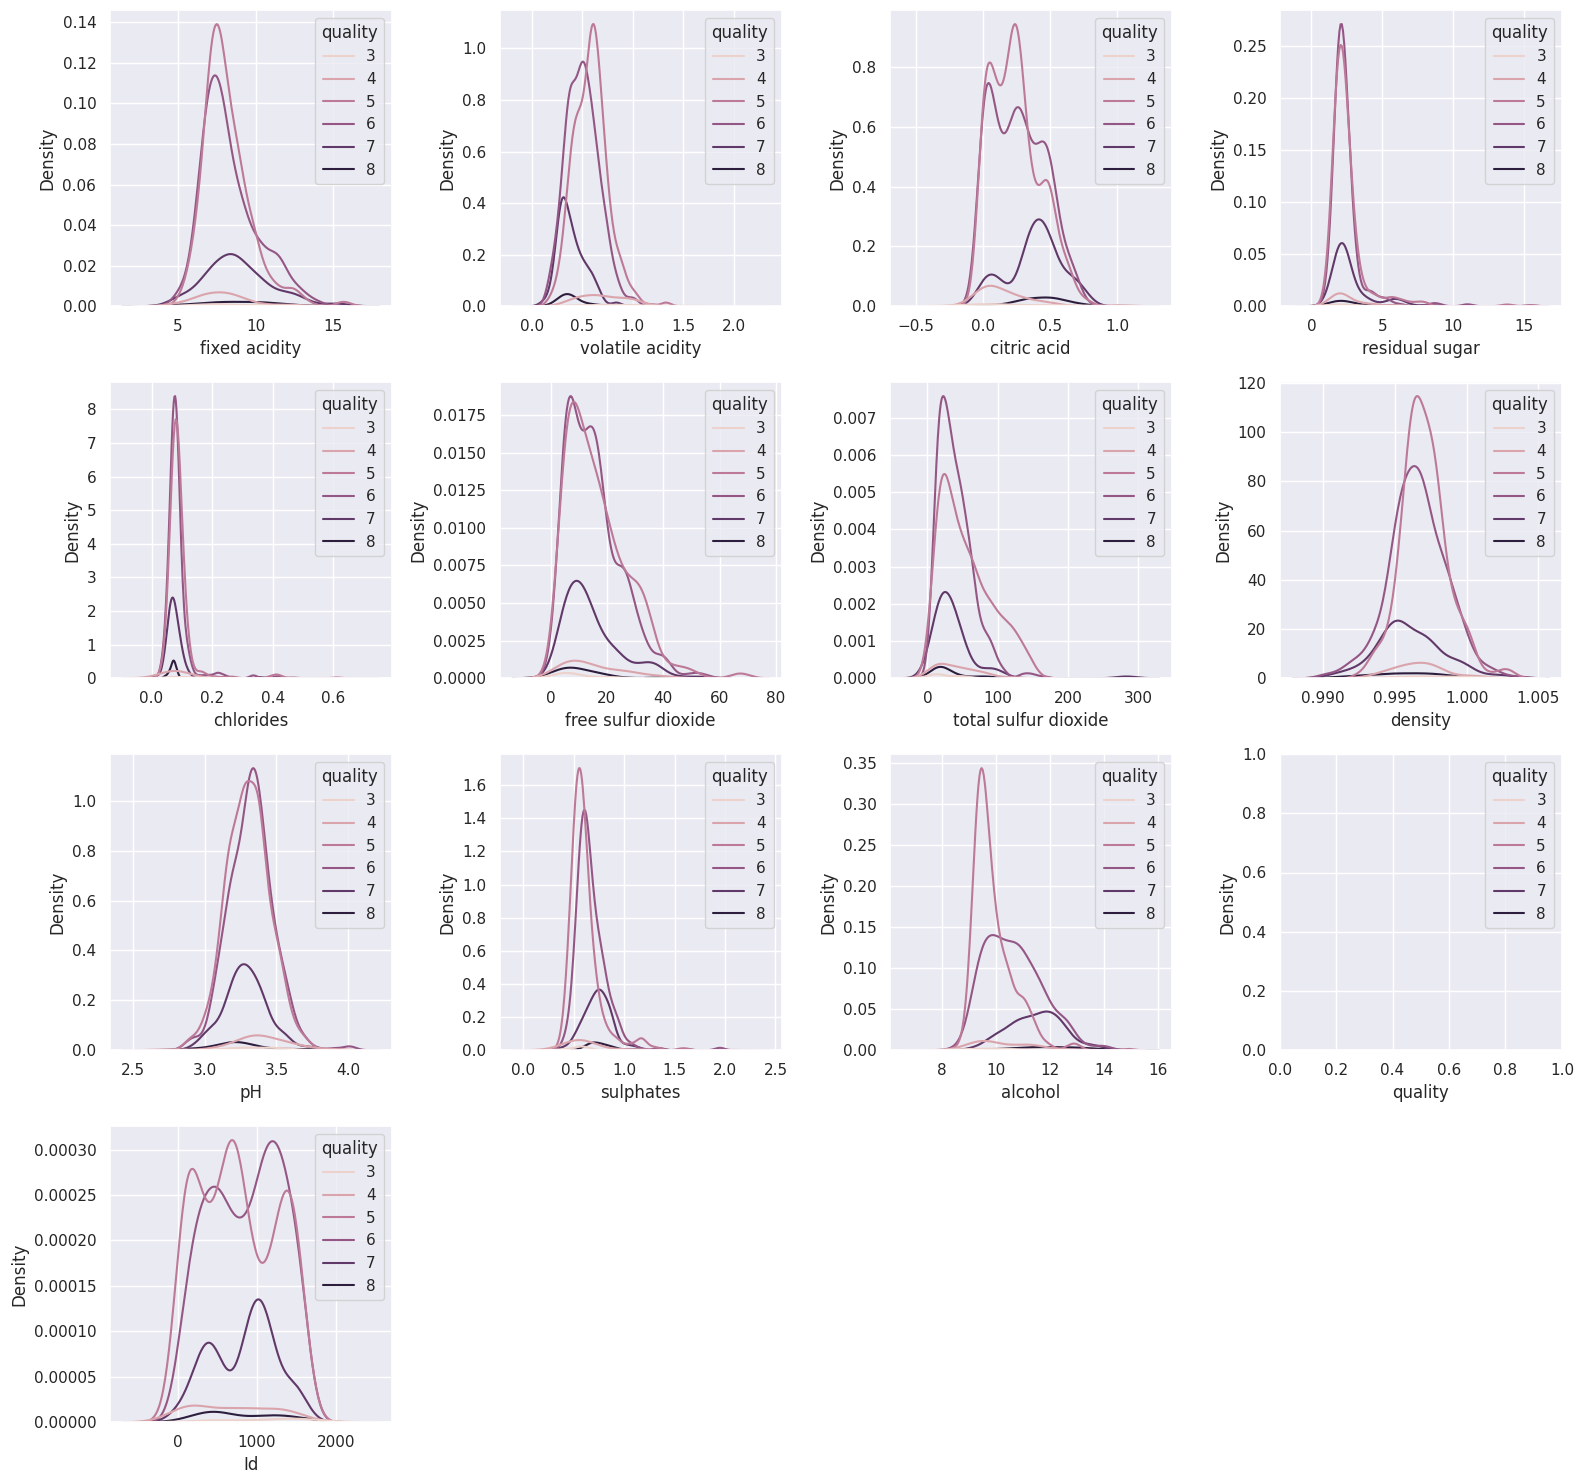

In [10]:
columns = df.columns
fig, ax = plt.subplots(4, 4, figsize=(16, 15))
ax = ax.flatten()

for i, column in enumerate(columns):
    sns.kdeplot(
        data=df,
        x=column,
        hue='quality',
        ax=ax[i]
    )

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()